In [41]:
#Code reference
#https://ariepratama.github.io/How-to-do-conjoint-analysis-in-python/

import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import zscore
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fast')


In [50]:
#Read in File
Mobile_Data_Raw = pd.read_csv('Mobile Price train.csv')
Mobile_Data_Raw.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [51]:
Mobile_Data_Raw.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [52]:
#Check for empty data
Mobile_Data_Raw.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [53]:
Mobile_Data_Raw.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [54]:
#Number of Unique Values for Binning
Mobile_Data_Raw.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [55]:
#Create Edited Dataset
mobile_data = Mobile_Data_Raw

#Create Screen Size varible by multiplying screen height(sc_h) and screen width(sc_w)
mobile_data["Screen_Size"] = mobile_data["sc_h"] * mobile_data["sc_w"]
#mobile_data['Screen_Size'] = mobile_data['sc_h']*mobile_data['sc_w']
mobile_data.head(10)
#Slide up each price_range value from 0
#mobile_data['price_range'].describe()
#mobile_data['price_range'] = mobile_data['price_range'] + 1
#mobile_data.head(5)
#mobile_data['price_range'].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Screen_Size
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,16
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1654,1067,17,1,10,1,0,0,1,17
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,1018,3220,13,8,18,1,0,1,3,104
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,1149,700,16,3,5,1,1,1,0,48
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,836,1099,17,1,20,1,0,0,0,17
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1224,513,19,10,12,1,0,0,0,190


In [9]:
mobile_data['clock_speed'].describe()

count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

In [10]:
Mobile_Data_Raw.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
Screen_Size       127
dtype: int64

In [98]:
#Turn Non-Binary Columns into Z-scores
#battery_power, clock_speed, fc, int_memory, m_dep,  mobile_wt, n_cores, pc, px_height, px_width, ram, Screen_Size

mobile_data_z = mobile_data[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc',
                           'px_height','px_width','ram','talk_time','Screen_Size']]
mobile_data_z = (mobile_data_z - mobile_data_z.mean())/mobile_data_z.std()
mobile_data_z.head()

#Create Leftover DF for Binary Columns + price_range column
mobile_data_other = mobile_data[['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]
mobile_data_other.head()


,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1


In [90]:
mobile_data_z

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,Screen_Size
0,-0.902372,0.830572,-0.762304,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,1.462128,-0.224630
1,-0.495015,-1.252751,-0.992642,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,-0.734084,-0.380831
2,-1.537302,-1.252751,-0.531966,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.368048,-0.758316
3,-1.418964,1.198217,-0.992642,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,-0.002013,0.621458
4,1.325574,-0.394912,2.001753,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,0.730057,-0.836417
5,1.412052,-1.252751,-0.301628,-0.553657,0.687376,0.670939,-1.538790,-0.480928,0.808715,0.931247,-0.974631,-0.185031,-0.823400
6,1.325574,0.217830,-0.071290,-1.214970,1.034098,-0.035283,1.520869,0.013769,-0.595132,-0.540296,1.010191,1.279110,0.309056
7,1.628247,-1.252751,-0.992642,-0.443438,1.034098,1.320663,-0.227507,-1.635222,-0.299941,-0.237195,-1.312963,-1.100119,-0.419881
8,0.469897,-1.252751,-0.992642,1.154735,0.687376,0.953427,1.083775,0.673365,-0.583865,-0.961398,-0.945130,1.645145,-0.823400
9,-1.660192,-1.130203,-0.531966,-1.270079,-1.392955,-1.334731,0.209587,0.838265,1.108412,-0.063664,-1.485356,0.181004,1.428496


## Model 1
This model used 5 different binnings to consolidate continous variables into discrete values

In [91]:
#Bin by Z scores using [Very Low, Low, Medium, High, Very High]
mobile_test = mobile_data_z
bin_labels = ['Very Low','Low', 'Medium', 'High','Very High']
cut_bins = [-4, -2, 0, 1, 2, 4]

mobile_test['battery_power'] = pd.cut(mobile_test['battery_power'], bins=cut_bins, labels=bin_labels)
mobile_test['clock_speed'] = pd.cut(mobile_test['clock_speed'], bins=cut_bins, labels=bin_labels)
mobile_test['fc'] = pd.cut(mobile_test['fc'], bins=cut_bins, labels=bin_labels)
mobile_test['int_memory'] = pd.cut(mobile_test['int_memory'], bins=cut_bins, labels=bin_labels)
mobile_test['m_dep'] = pd.cut(mobile_test['m_dep'], bins=cut_bins, labels=bin_labels)
mobile_test['mobile_wt'] = pd.cut(mobile_test['mobile_wt'], bins=cut_bins, labels=bin_labels)
mobile_test['n_cores'] = pd.cut(mobile_test['n_cores'], bins=cut_bins, labels=bin_labels)
mobile_test['pc'] = pd.cut(mobile_test['pc'], bins=cut_bins, labels=bin_labels)
mobile_test['px_height'] = pd.cut(mobile_test['px_height'], bins=cut_bins, labels=bin_labels)
mobile_test['px_width'] = pd.cut(mobile_test['px_width'], bins=cut_bins, labels=bin_labels)
mobile_test['ram'] = pd.cut(mobile_test['ram'], bins=cut_bins, labels=bin_labels)
mobile_test['talk_time'] = pd.cut(mobile_test['talk_time'], bins=cut_bins, labels=bin_labels)
mobile_test['Screen_Size'] = pd.cut(mobile_test['Screen_Size'], bins=cut_bins, labels=bin_labels)

mobile_test.head()




,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,Screen_Size
0,Low,Medium,Low,Low,Medium,High,Low,Low,Low,Low,Medium,High,Low
1,Low,Low,Low,High,Medium,Low,Low,Low,Medium,High,Medium,Low,Low
2,Low,Low,Low,Medium,High,Medium,Medium,Low,High,High,Medium,Low,Low
3,Low,High,Low,Low,High,Low,Medium,Low,High,High,Medium,Low,Medium
4,High,Low,Very High,Medium,Medium,Medium,Low,Medium,High,Low,Low,Medium,Low


In [92]:
mobile_test.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
talk_time        0
Screen_Size      0
dtype: int64

In [93]:
#Merge Dataframes
mobile_data_final = pd.concat([mobile_test, mobile_data_other], axis=1)
mobile_data_final.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,Screen_Size,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,Low,Medium,Low,Low,Medium,High,Low,Low,Low,Low,Medium,High,Low,0,0,0,0,0,1,1
1,Low,Low,Low,High,Medium,Low,Low,Low,Medium,High,Medium,Low,Low,1,1,1,1,1,0,2
2,Low,Low,Low,Medium,High,Medium,Medium,Low,High,High,Medium,Low,Low,1,1,1,1,1,0,2
3,Low,High,Low,Low,High,Low,Medium,Low,High,High,Medium,Low,Medium,1,0,0,1,0,0,2
4,High,Low,Very High,Medium,Medium,Medium,Low,Medium,High,Low,Low,Medium,Low,1,0,1,1,1,0,1


In [94]:
#Split Dataset into dependent(y) and independent variables(x)
y = mobile_data_final['price_range']
x = mobile_data_final[[x for x in mobile_data_final.columns if x != 'price_range']]

#Create Dummy varibales
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'price_range'])


xdum.head()



,battery_power_Very Low,battery_power_Low,battery_power_Medium,battery_power_High,battery_power_Very High,clock_speed_Very Low,clock_speed_Low,clock_speed_Medium,clock_speed_High,clock_speed_Very High,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1,0
3,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,1,0


In [95]:
#Conjoint Analysis using Ordinary Least Squares regression
CJ = sm.OLS(y, xdum).fit()
CJ.summary()


C:\Users\spsch\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\spsch\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\spsch\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\spsch\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     230.3
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:32:31   Log-Likelihood:                -1431.0
No. Observations:                2000   AIC:                             2934.
Df Residuals:                    1964   BIC:                             3136.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
battery_power_Very Low   1.241e-18   1.01e-18      1.225      0.221   -7.46e-19    3.23e-18
battery_power_Low          -0.1626      0.015    -10.855      0.000      -0.192      -0.133
battery_power_Medium        0.1237      0.017      7.162      0.000       0.090       0.158
battery_power_High          0.3321      0.019     17.793      0.000       0.295       0.369
battery_power_Very High  2.109e-16   2.68e-17      7.865      0.000    1.58e-16    2.63e-16
clock_speed_Very Low    -3.894e-17   1.82e-17     -2.138      0.033   -7.47e-17   -3.22e-18
clock_speed_Low             0.1147      0.015      7.699      0.000       0.085       0.144
clock_speed_Medium          0.1005      0.017      5.752      0.000       0.066       0.135
clock_speed_High            0.0780      0.019      4.126      0.000       0.041       0.115
clock_speed_Very High   -8.971e-17   1.82e-17     -4.934      0.000   -1.25e-16   -5.41e-17
fc_Very Low             -2.758e-16   1.34e-17    -20.587      0.000   -3.02e-16    -2.5e-16
fc_Low                      0.0657      0.022      2.965      0.003       0.022       0.109
fc_Medium                   0.0873      0.024      3.698      0.000       0.041       0.134
fc_High                     0.1107      0.029      3.821      0.000       0.054       0.167
fc_Very High                0.0295      0.038      0.770      0.441      -0.046       0.105
int_memory_Very Low     -1.084e-16    1.6e-17     -6.791      0.000    -1.4e-16   -7.71e-17
int_memory_Low              0.0604      0.015      4.037      0.000       0.031       0.090
int_memory_Medium           0.1233      0.017      7.127      0.000       0.089       0.157
int_memory_High             0.1095      0.019      5.782      0.000       0.072       0.147
int_memory_Very High    -1.469e-16   1.14e-17    -12.927      0.000   -1.69e-16   -1.25e-16
m_dep_Very Low             8.1e-17   1.24e-17      6.528      0.000    5.67e-17    1.05e-16
m_dep_Low                   0.0957      0.015      6.389      0.000       0.066       0.125
m_dep_Medium                0.1118      0.020      5.726      0.000       0.074       0.150
m_dep_High                  0.0857      0.018      4.774      0.000       0.050       0.121
m_dep_Very High          6.338e-17    7.2e-18      8.797      0.000    4.92e-17    7.75e-17
mobile_wt_Very Low      -1.795e-18   6.11e-18     -0.294      0.769   -1.38e-17    1.02e-17
mobile_wt_Low               0.1261      0.015      8.464      0.000       0.097       0.155
mobile_wt_Medium            0.1102      0.017      6.457      0.000       0.077       0.144
mobile_wt_High              0.0569      0.019      3.050      0.002       0.020       0.093
mobile_wt_Very High     -5.157e-17   8.77e-18     -5.879      0.000   -6.88e-17   -3.44e-17
n_cores_Very Low        -3.233e-16   1.26e-17  

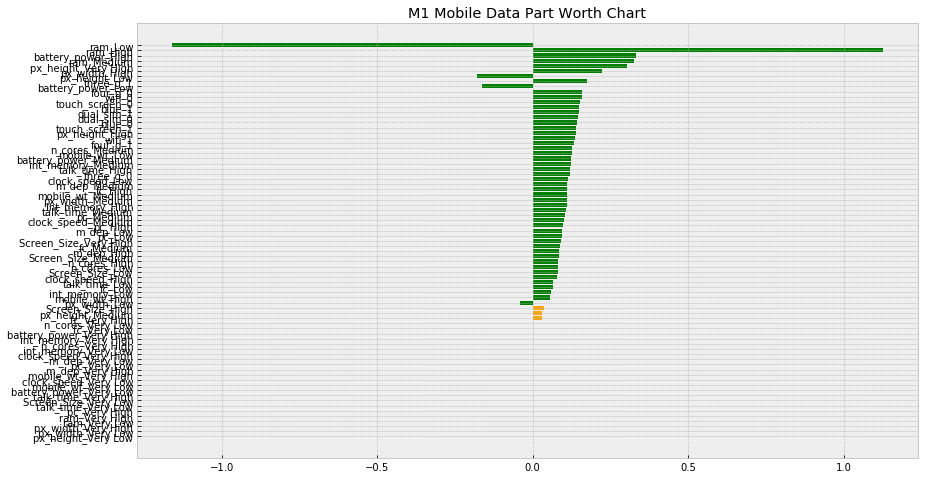

In [96]:
#Part Worth Chart Setup
df_CJ = pd.DataFrame({
    'param_name': CJ.params.keys()
    , 'param_w': CJ.params.values
    , 'pval': CJ.pvalues
})
# Adding absolute values
df_CJ['abs_param_w'] = np.abs(df_CJ['param_w'])
# Significant Values
df_CJ['is_sig_95'] = (df_CJ['pval'] < 0.05)
# constructing color naming for each param
df_CJ['c'] = ['green' if x else 'orange' for x in df_CJ['is_sig_95']]

# make it sorted by abs of parameter value
df_CJ = df_CJ.sort_values(by='abs_param_w', ascending=True)


#Part Worth Chart

f, ax = plt.subplots(figsize=(14, 8))
plt.title('M1 Mobile Data Part Worth Chart')
pwu = df_CJ['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_CJ['c'])
plt.yticks(xbar, labels=df_CJ['param_name'])
plt.show()


## Model 2
Because there were too many null values using 5 bins, the data was consolidated into only 3 bins 'Low', 'Medium', 'High' and the analysis was run again.  This also will help reduce the final chart into less variables and more readable pieces.

In [99]:
#Bin by Z scores using [Low, Medium, High]
mobile_test_2 = mobile_data_z
bin_labels_2 = ['Low', 'Medium', 'High']
cut_bins_2 = [-4, 0, 1, 4]

mobile_test_2['battery_power'] = pd.cut(mobile_test_2['battery_power'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['clock_speed'] = pd.cut(mobile_test_2['clock_speed'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['fc'] = pd.cut(mobile_test_2['fc'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['int_memory'] = pd.cut(mobile_test_2['int_memory'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['m_dep'] = pd.cut(mobile_test_2['m_dep'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['mobile_wt'] = pd.cut(mobile_test_2['mobile_wt'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['n_cores'] = pd.cut(mobile_test_2['n_cores'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['pc'] = pd.cut(mobile_test_2['pc'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['px_height'] = pd.cut(mobile_test_2['px_height'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['px_width'] = pd.cut(mobile_test_2['px_width'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['ram'] = pd.cut(mobile_test_2['ram'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['talk_time'] = pd.cut(mobile_test_2['talk_time'], bins=cut_bins_2, labels=bin_labels_2)
mobile_test_2['Screen_Size'] = pd.cut(mobile_test_2['Screen_Size'], bins=cut_bins_2, labels=bin_labels_2)

mobile_test_2.head()


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,Screen_Size
0,Low,Medium,Low,Low,Medium,High,Low,Low,Low,Low,Medium,High,Low
1,Low,Low,Low,High,Medium,Low,Low,Low,Medium,High,Medium,Low,Low
2,Low,Low,Low,Medium,High,Medium,Medium,Low,High,High,Medium,Low,Low
3,Low,High,Low,Low,High,Low,Medium,Low,High,High,Medium,Low,Medium
4,High,Low,High,Medium,Medium,Medium,Low,Medium,High,Low,Low,Medium,Low


In [100]:
#Check to Make sure all values are binned
mobile_test_2.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
talk_time        0
Screen_Size      0
dtype: int64

In [101]:
#Merge
mobile_data_final_2 = pd.concat([mobile_test_2, mobile_data_other], axis=1)
mobile_data_final_2.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,Screen_Size,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,Low,Medium,Low,Low,Medium,High,Low,Low,Low,Low,Medium,High,Low,0,0,0,0,0,1,1
1,Low,Low,Low,High,Medium,Low,Low,Low,Medium,High,Medium,Low,Low,1,1,1,1,1,0,2
2,Low,Low,Low,Medium,High,Medium,Medium,Low,High,High,Medium,Low,Low,1,1,1,1,1,0,2
3,Low,High,Low,Low,High,Low,Medium,Low,High,High,Medium,Low,Medium,1,0,0,1,0,0,2
4,High,Low,High,Medium,Medium,Medium,Low,Medium,High,Low,Low,Medium,Low,1,0,1,1,1,0,1


In [102]:
#Split Dataset into dependent(y) and independent variables(x)
y2 = mobile_data_final_2['price_range']
x2 = mobile_data_final_2[[x for x in mobile_data_final_2.columns if x != 'price_range']]

#Create Dummy varibales
xdum2 = pd.get_dummies(x2, columns=[c for c in x2.columns if c != 'price_range'])


xdum2.head()

,battery_power_Low,battery_power_Medium,battery_power_High,clock_speed_Low,clock_speed_Medium,clock_speed_High,fc_Low,fc_Medium,fc_High,int_memory_Low,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,1,0,0,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1,0
2,1,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,1,0
3,1,0,0,0,0,1,1,0,0,1,...,1,0,1,0,0,1,1,0,1,0
4,0,0,1,1,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,1,0


In [103]:
#Conjoint Analysis using Ordinary Least Squares regression
CJ_2 = sm.OLS(y2, xdum2).fit()
CJ_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     250.8
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:33:22   Log-Likelihood:                -1435.6
No. Observations:                2000   AIC:                             2937.
Df Residuals:                    1967   BIC:                             3122.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
battery_power_Low       -0.1704      0.015    -11.393      0.000      -0.200      -0.141
battery_power_Medium     0.1200      0.017      6.950      0.000       0.086       0.154
battery_power_High       0.3261      0.019     17.464      0.000       0.289       0.363
clock_speed_Low          0.1101      0.015      7.384      0.000       0.081       0.139
clock_speed_Medium       0.0963      0.017      5.509      0.000       0.062       0.131
clock_speed_High         0.0694      0.019      3.679      0.000       0.032       0.106
fc_Low                   0.0792      0.018      4.408      0.000       0.044       0.114
fc_Medium                0.1012      0.019      5.241      0.000       0.063       0.139
fc_High                  0.0954      0.023      4.209      0.000       0.051       0.140
int_memory_Low           0.0542      0.015      3.625      0.000       0.025       0.083
int_memory_Medium        0.1161      0.017      6.722      0.000       0.082       0.150
int_memory_High          0.1055      0.019      5.584      0.000       0.068       0.143
m_dep_Low                0.0885      0.015      5.912      0.000       0.059       0.118
m_dep_Medium             0.1083      0.020      5.546      0.000       0.070       0.147
m_dep_High               0.0790      0.018      4.401      0.000       0.044       0.114
mobile_wt_Low            0.1206      0.015      8.088      0.000       0.091       0.150
mobile_wt_Medium         0.1040      0.017      6.091      0.000       0.071       0.138
mobile_wt_High           0.0512      0.019      2.745      0.006       0.015       0.088
n_cores_Low              0.0761      0.015      5.113      0.000       0.047       0.105
n_cores_Medium           0.1210      0.018      6.744      0.000       0.086       0.156
n_cores_High             0.0786      0.018      4.484      0.000       0.044       0.113
pc_Low                   0.0880      0.018      4.851      0.000       0.052       0.124
pc_Medium                0.1009      0.017      5.838      0.000       0.067       0.135
pc_High                  0.0869      0.020      4.387      0.000       0.048       0.126
px_height_Low           -0.0951      0.017     -5.660      0.000      -0.128      -0.062
px_height_Medium         0.1148      0.018      6.310      0.000       0.079       0.151
px_height_High           0.2560      0.022     11.667      0.000       0.213       0.299
px_width_Low            -0.0504      0.017     -2.943      0.003      -0.084      -0.017
px_width_Medium          0.0954      0.017      5.558      0.000       0.062       0.129
px_width_High            0.2307      0.020     11.586      0.000       0.192       0.270
ram_Low                 -1.1640      0.015    -77.664      0.000      -1.193      -1.135
ram_Medium               0.3220      0.017     18.928    

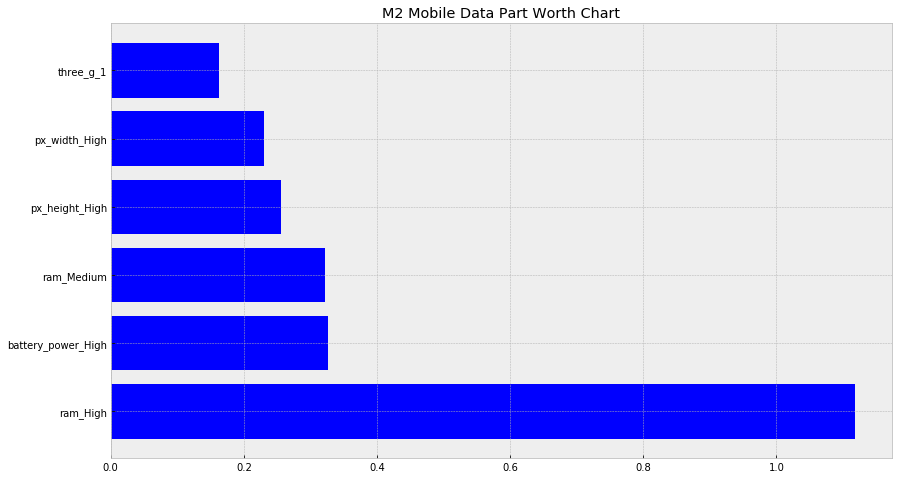

In [128]:
#Part Worth Chart Setup
df_CJ2 = pd.DataFrame({
    'param_name': CJ_2.params.keys()
    , 'param_w': CJ_2.params.values
    , 'pval': CJ_2.pvalues
})
# Adding absolute values
df_CJ2['abs_param_w'] = np.abs(df_CJ2['param_w'])
# Significant Values
df_CJ2['is_sig_95'] = (df_CJ2['pval'] < 0.05)
# constructing color naming for each param
df_CJ2['c'] = ['blue' if x else 'red' for x in df_CJ2['is_sig_95']]

# make it sorted by abs of parameter value
df_CJ2 = df_CJ2.sort_values(by='abs_param_w', ascending=True)
df_CJ2 = df_CJ2.nlargest(6,'param_w')

#Part Worth Chart

f, ax = plt.subplots(figsize=(14, 8))
plt.title('M2 Mobile Data Part Worth Chart')
pwu = df_CJ2['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_CJ2['c'])
plt.yticks(xbar, labels=df_CJ2['param_name'])
plt.show()

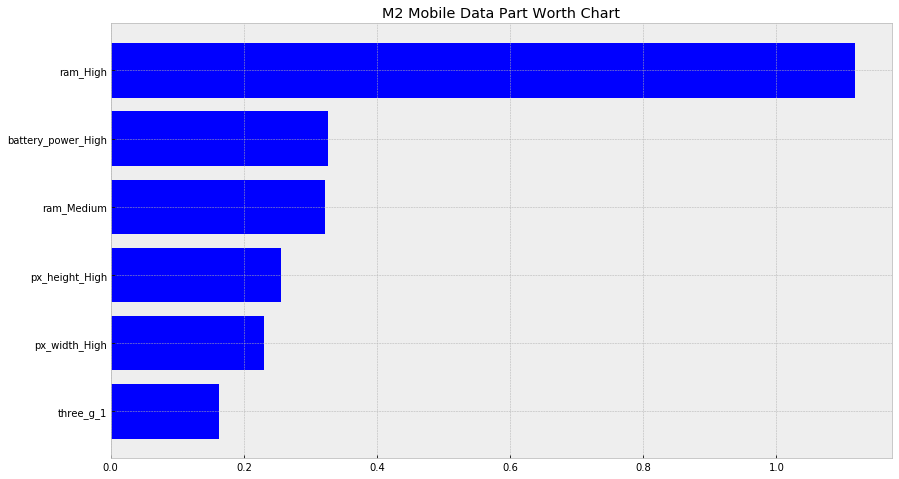

In [129]:
# make it sorted by abs of parameter value
df_CJ2 = df_CJ2.sort_values(by='abs_param_w', ascending=True)
df_CJ2 = df_CJ2.nsmallest(6,'param_w')

#Part Worth Chart

f, ax = plt.subplots(figsize=(14, 8))
plt.title('M2 Mobile Data Part Worth Chart')
pwu = df_CJ2['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_CJ2['c'])
plt.yticks(xbar, labels=df_CJ2['param_name'])
plt.show()

In [135]:
#coefficients
df_CJ2_DF = pd.DataFrame({
    'param_name': CJ_2.params.keys()
    , 'param_w': CJ_2.params.values
})

df_CJ2_DF.sort_values(by = 'param_w', ascending = False)

,param_name,param_w
32,ram_High,1.117667
2,battery_power_High,0.326072
31,ram_Medium,0.322050
26,px_height_High,0.256046
29,px_width_High,0.230700
46,three_g_1,0.163086
43,four_g_0,0.149921
49,wifi_0,0.149675
47,touch_screen_0,0.144523
40,blue_1,0.141716
